In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel('extreme_examples.xlsx', header=None, names=['text', 'label', 'category'])

In [16]:
df.head(5)

,text,label,category
0,"Oczywiście, że masz rację. Jak zawsze, tylko t...",1,1
1,"Wspaniale, właśnie takich ludzi potrzebujemy –...",1,1
2,Ale tu pięknie pachnie prawie jakbym wszedł do...,1,1
3,Jaki ty jesteś wysoki prawie wyższy od mojego ...,1,1
4,Bardzo dobrze gratuluje mózgu,1,1


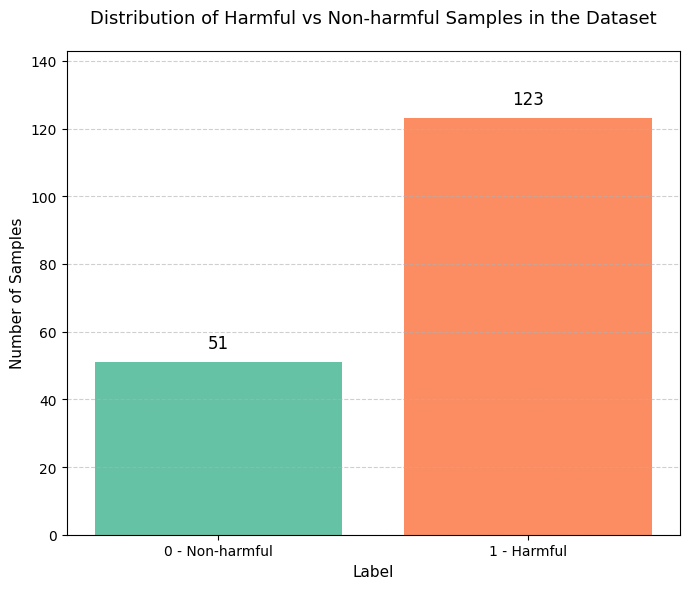

In [ ]:
label_counts = df['label'].value_counts().sort_index().reset_index()
label_counts.columns = ['label', 'count']
label_names = {0: '0 - Non-harmful', 1: '1 - Harmful'}
label_counts['label_name'] = label_counts['label'].map(label_names)

plt.figure(figsize=(7, 6))
bars = plt.bar(label_counts['label_name'], label_counts['count'], color=['#66c2a5', '#fc8d62'])

y_max = label_counts['count'].max()
plt.ylim(0, y_max + 20)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 3, str(int(yval)),
             ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Harmful vs Non-harmful Samples in the Dataset', fontsize=13, pad=20)
plt.xlabel('Label', fontsize=11)
plt.ylabel('Number of Samples', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [ ]:
df['char_count'] = df['text'].str.len()

df['word_count'] = df['text'].str.split().apply(len)

stats = df.groupby('label').agg(
    avg_chars=('char_count', 'mean'),
    avg_words=('word_count', 'mean')
).reset_index()

stats['avg_chars'] = stats['avg_chars'].round(2)
stats['avg_words'] = stats['avg_words'].round(2)

label_names = {0: 'Klasa 0 (nieszkodliwe)', 1: 'Klasa 1 (szkodliwe)'}
stats['label_desc'] = stats['label'].map(label_names)

for _, row in stats.iterrows():
    print(f"{row['label_desc']}:")
    print(f"– Średnia liczba znaków: {row['avg_chars']}")
    print(f"– Średnia liczba słów: {row['avg_words']}\n")

Klasa 0 (nieszkodliwe):
– Średnia liczba znaków: 148.08
– Średnia liczba słów: 23.61

Klasa 1 (szkodliwe):
– Średnia liczba znaków: 118.49
– Średnia liczba słów: 19.3



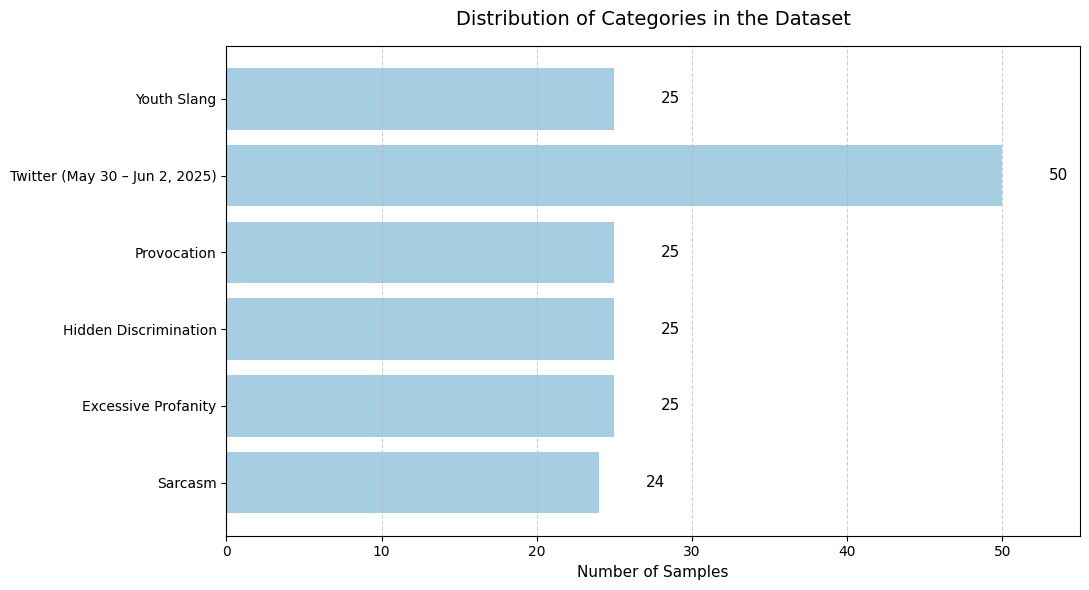

In [ ]:
category_labels = {
    1: 'Sarcasm',
    2: 'Excessive Profanity',
    3: 'Hidden Discrimination',
    4: 'Provocation',
    5: 'Twitter (May 30 – Jun 2, 2025)',
    6: 'Youth Slang'
}

category_counts = df['category'].value_counts().sort_index().reset_index()
category_counts.columns = ['category', 'count']
category_counts['category_name'] = category_counts['category'].map(category_labels)

plt.figure(figsize=(11, 6))
bars = plt.barh(category_counts['category_name'], category_counts['count'], color='#a6cee3')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center', fontsize=11)

plt.title('Distribution of Categories in the Dataset', fontsize=14, pad=15)
plt.xlabel('Number of Samples', fontsize=11)
plt.xlim(0, category_counts['count'].max() + 5)  # Add margin to avoid overflow
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()